## Importing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load("en_core_web_sm")

In [3]:
FILE_PATH = "./data.csv"
df = pd.read_csv(FILE_PATH)

df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
df.Sentiment.value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

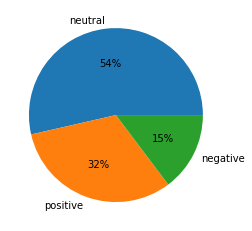

In [5]:
pie_data = df.Sentiment.value_counts()

plt.pie(pie_data, labels=pie_data.index, autopct='%.0f%%')
plt.show()

## Map words to Pandas Series

Todo:
- Remove prepositions
- Take top 100 from each sentiment
- train_test_split
- create classifier based on word sentiment count

In [62]:
def map_words(sentence):
    doc = nlp(sentence.lower())
    for token in doc:
        if token.is_alpha == False or token.pos_ not in ["ADJ","NOUN", "VERB"]:
            continue
        if str(token.lemma_) in words.keys():
            words[str(token.lemma_)] += 1
        else:
            words[str(token.lemma_)] = 1

sentiments = dict.fromkeys(["positive", "neutral", "negative"])
for sentiment in sentiments:
    words = {}
    df.loc[df.Sentiment == sentiment].Sentence.apply(map_words)
    sentiments.update({sentiment: pd.Series(words.values(), index=words.keys())}) 

In [67]:
sentiments["positive"].sort_values(ascending=False).iloc[0:20]

eur         422
year        236
mn          235
sale        229
company     227
say         223
profit      209
net         197
increase    171
m           145
finnish     141
period      141
rise        126
quarter     124
share       114
mln          98
new          97
market       94
service      89
group        87
dtype: int64